In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2024-04-08 10:40:35.745161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_path=os.getcwd()+"/rgb_dataset"
print(dataset_path)

img_height,img_width=200,200
batch_size=32

/Users/bhavesh/Documents/Rutgers/Courses/5) Spring 2024/536/Project/Sign_Language_Interpreter_CNN/rgb_dataset


In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12000 files belonging to 4 classes.
Using 9600 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12000 files belonging to 4 classes.
Using 2400 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['I', 'L', 'V', 'Y']


2024-04-08 10:41:20.882914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


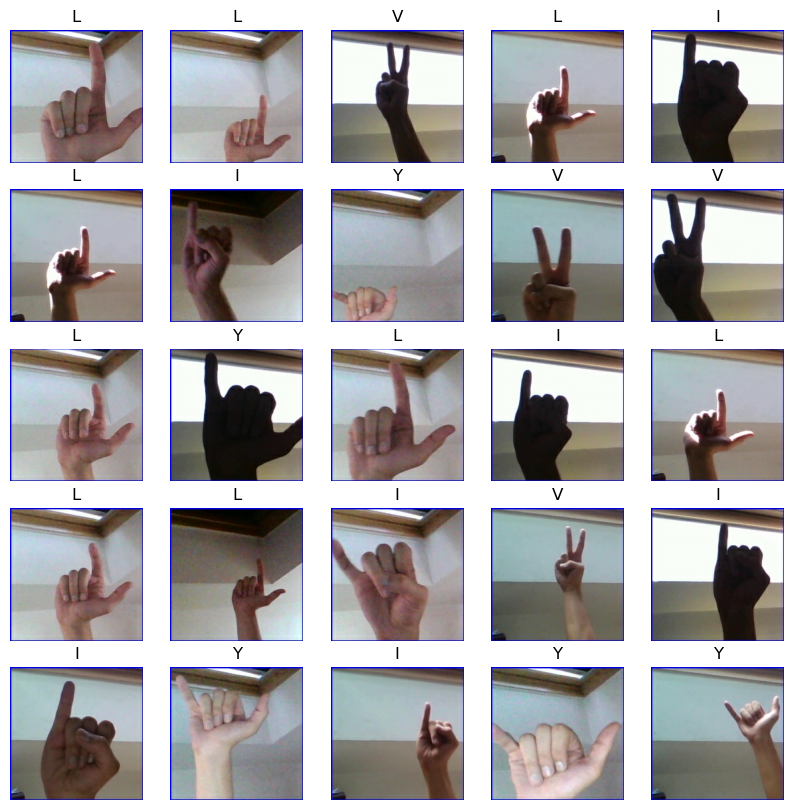

In [6]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:

resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(200,200,3),
                   pooling='avg',classes=29,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(29, activation='softmax'))

In [8]:
resnet_model.build((None, img_height, img_width, 3))

In [9]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,651,677 (94.04 MB)

 Trainable params: 1,063,965 (4.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.9103 - loss: 0.3014 - val_accuracy: 0.9962 - val_loss: 0.0097
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.9998 - loss: 0.0038 - val_accuracy: 0.9967 - val_loss: 0.0115
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.4446e-04
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 1.0000 - loss: 3.7209e-04 - val_accuracy: 1.0000 - val_loss: 8.0155e-04
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - accuracy: 1.0000 - loss: 2.4008e-04 - val_accuracy: 1.0000 - val_loss: 6.5964e-04


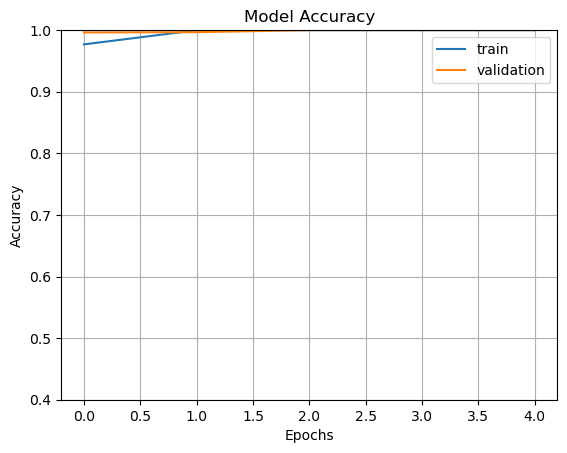

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

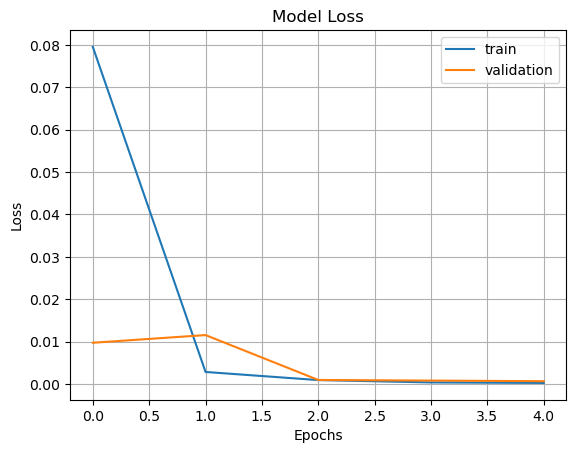

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

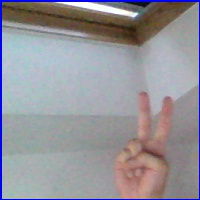

In [14]:
from pathlib import Path
sign = list(Path(dataset_path).glob('V/*'))
PIL.Image.open(str(sign[4]))

In [15]:
import cv2
image=cv2.imread(str(sign[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 200, 200, 3)


In [16]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.0676483e-05 1.5404522e-08 9.9998927e-01 3.9654532e-10 1.1239493e-15
  1.1158325e-15 1.6004353e-13 3.3236844e-14 2.5943958e-13 3.0935874e-13
  4.6108514e-15 4.4331492e-14 1.5665761e-13 2.9514531e-14 2.5376812e-14
  1.8701236e-14 1.0945055e-14 2.7786848e-14 1.4220034e-15 5.5886306e-15
  4.2052210e-13 2.8029883e-15 6.8491880e-15 1.7465456e-13 4.8978294e-14
  2.8901562e-15 9.2983835e-14 8.5504906e-16 1.9617865e-15]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

In [ ]:
import cv2
# import mediapipe as mp
import numpy as np

# model_dict = pickle.load(open('./model.p', 'rb'))
# model = model_dict['model']

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 640)
while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    H, W, _ = frame.shape
    frame_rgb = cv2.resize(frame, (200, 200), interpolation=cv2.INTER_AREA)
    frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2RGB)
    # frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_GRAY2RGB)
    print(H,W)
    print(frame_rgb.shape)
    # print(frame_rgb)
    l=[]
    l.append(frame_rgb)
    frame_rgb=np.array(l)
    # plt.imshow(frame_rgb[0])
    
    prediction = resnet_model.predict(frame_rgb)
    # print(prediction)
    predicted_character = class_names[np.argmax(prediction)]
    print(predicted_character)

    cv2.putText(frame, predicted_character, (200,200), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 3)

    cv2.imshow('frame', frame)
    cv2.waitKey(1)


cap.release()
cv2.destroyAllWindows()

In [21]:
cap.release()
cv2.destroyAllWindows()

: 